In [1]:
import func_data_cleaning as dc

In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set_theme(style="darkgrid")

# set directories
cwd = os.getcwd()
main_dir = os.path.split(cwd)[0]
data_ils_dir = os.path.join(main_dir, 'dataPackage', 'task-ils')
data_rest_dir = os.path.join(main_dir, 'dataPackage', 'task-rest')
data_pkg_dir = os.path.join(main_dir, 'dataPackage')

In [3]:
# create directory if not exisit
output_dir = os.path.join(main_dir,'Cleaned Data')
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)
#rest data cleaning
rest_output_dir = os.path.join(main_dir,'Cleaned Data Rest')
if not os.path.isdir(rest_output_dir):
    os.makedirs(rest_output_dir)

In [4]:
cap_name_list = pd.read_csv(os.path.join(data_pkg_dir,'train_cap_names.csv'))
level_list = pd.read_csv(os.path.join(data_pkg_dir,'all_levels.csv'))
sensor_freq_list = pd.read_csv(os.path.join(data_pkg_dir,'selected_sensor_cutoff_freq.csv'))

In [148]:
#test
csv_dir = data_csv_list[1]
sr = dc.get_csv_freq(csv_dir)
cut_off_freq = sensor_freq_list.loc[sensor_freq_list['sensor_name'] == sensor, 'freq'].iloc[0]
dsr = np.rint(sr/(lpf*2))
df = pd.read_csv(csv_dir)

In [9]:
# data cleaning for ils data
for cap in cap_name_list['cp_ID']:
    for level in level_list['level']:
        for sensor in sensor_freq_list['sensor_name']:
            try:
                data_csv_list = dc.get_dirs_to_csv(data_ils_dir, cap, level, sensor)
                run = 0
                for csv_dir in data_csv_list:
                    run = run + 1
                    sr = dc.get_csv_freq(csv_dir)
                    cut_off_freq = sensor_freq_list.loc[sensor_freq_list['sensor_name'] == sensor, 'freq'].iloc[0]
                    dsr = np.rint(sr/(cut_off_freq*2))
                    df = pd.read_csv(csv_dir)
                    # remove from df before simulation start and after simulation ends (12 Dec new)
                    head, tail = dc.get_head_tail_time_to_remove(csv_dir)
                    # remove before start
                    if head > 0:
                        head_rows = head * sr
                        head_rows = int(head_rows) + (head_rows % 1 > 0)
                        df = df.drop(df.index[:head_rows])
                    #remove after stop
                    if tail > 0:
                        tail_rows = tail * sr
                        tail_rows = int(tail_rows) + (tail_rows % 1 > 0)
                        df = df.drop(df.index[-tail_rows:])
                    # end of 12 Dec New added code
                    for column in df:
                        if column != 'time_dn':
                            df1 = df[column]
                            X = np.fft.fft(df1,axis=0)
                            X_lpf = X
                            X_lpf[cut_off_freq*sr:] = 0
                            Y_lpf = np.fft.ifft(X_lpf,axis=0)
                            Y_lpf = Y_lpf.real
                            Y_dsp = Y_lpf[::int(dsr)]
                            output_csv = os.path.join(output_dir, f"{sensor}_{column}_{level}_{cap}_{run}.csv")
                            df_out = pd.DataFrame(Y_dsp)
                            df_out.columns = [column]
                            df_out.to_csv(output_csv, index=False)
            except:
                print (cap, level, sensor, run)
                pass


cp006 01B lslshimmertorsoacc 3
cp006 01B lslshimmereda 3
cp006 01B lslshimmeremg 3
cp006 01B lslshimmerresp 3
cp006 01B lslrespitrace 3
cp006 01B lslshimmerecg 3
cp006 02B lslshimmertorsoacc 3
cp006 02B lslshimmereda 3
cp006 02B lslshimmeremg 3
cp006 02B lslshimmerresp 3
cp006 02B lslrespitrace 3
cp006 02B lslshimmerecg 3
cp006 03B lslshimmertorsoacc 3
cp006 03B lslshimmereda 3
cp006 03B lslshimmeremg 3
cp006 03B lslshimmerresp 3
cp006 03B lslrespitrace 3
cp006 03B lslshimmerecg 3
cp006 04B lslshimmertorsoacc 3
cp006 04B lslshimmereda 3
cp006 04B lslshimmeremg 3
cp006 04B lslshimmerresp 3
cp006 04B lslrespitrace 3
cp006 04B lslshimmerecg 3
cp009 01B lslshimmereda 3
cp009 01B lslshimmerresp 3
cp009 01B lslshimmerecg 3
cp009 02B lslshimmereda 3
cp009 02B lslshimmerresp 3
cp009 02B lslshimmerecg 3
cp009 03B lslshimmereda 3
cp009 03B lslshimmerresp 3
cp009 03B lslshimmerecg 3
cp009 04B lslshimmereda 3
cp009 04B lslshimmerresp 3
cp009 04B lslshimmerecg 3
cp028 01B lslshimmeremg 1


In [11]:
# data cleaning for rest data
level = '000'
for cap in cap_name_list['cp_ID']:
        for sensor in sensor_freq_list['sensor_name']:
            try:
                data_csv_list = dc.get_dirs_to_csv(data_rest_dir, cap, level, sensor)
                run = 0
                for csv_dir in data_csv_list:
                    run = run + 1
                    sr = dc.get_csv_freq(csv_dir)
                    cut_off_freq = sensor_freq_list.loc[sensor_freq_list['sensor_name'] == sensor, 'freq'].iloc[0]
                    dsr = np.rint(sr/(cut_off_freq*2))
                    df = pd.read_csv(csv_dir)
                    for column in df:
                        if column != 'time_dn':
                            df1 = df[column]
                            X = np.fft.fft(df1,axis=0)
                            X_lpf = X
                            X_lpf[cut_off_freq*sr:] = 0
                            Y_lpf = np.fft.ifft(X_lpf,axis=0)
                            Y_lpf = Y_lpf.real
                            Y_dsp = Y_lpf[::int(dsr)]
                            output_csv = os.path.join(rest_output_dir, f"{sensor}_{column}_{level}_{cap}_{run}.csv")
                            df_out = pd.DataFrame(Y_dsp)
                            df_out.columns = [column]
                            df_out.to_csv(output_csv, index=False)
            except:
                 print (cap, level, sensor, run)
                 pass


cp009 000 lslshimmereda 1
cp009 000 lslshimmerresp 1
cp009 000 lslshimmerecg 1
cp028 000 lslshimmeremg 1
cp042 000 lslshimmeremg 2


In [93]:
for column in df:
    if column != 'time_dn':
        df1 = df[column]
        X = np.fft.fft(df1,axis=0)
        X_lpf = X
        X_lpf[cut_off_freq*sr:] = 0
        Y_lpf = np.fft.ifft(X_lpf,axis=0)
        Y_lpf = np.abs(Y_lpf)
        Y_dsp = Y_lpf[::int(dsr)]
        
        

In [5]:
# test code to run on isolated file
cap = 'cp003'
level = '01B'
sensor = 'lslshimmerecg'
data_csv_list = dc.get_dirs_to_csv(data_ils_dir, cap, level, sensor)
run = 0
# test
csv_dir = '/Users/ryan/Library/CloudStorage/OneDrive-Personal/CogPilot Data Challenge/data/dataPackage/task-ils/sub-cp003/ses-20210206/level-01B_run-001/sub-cp003_ses-20210206_task-ils_stream-lslshimmerecg_feat-chunk_level-01B_run-001_dat.csv'
run = run + 1
sr = dc.get_csv_freq(csv_dir)
#sr = 504.11
#sr = int(sr) + (sr%1>0)
cut_off_freq = sensor_freq_list.loc[sensor_freq_list['sensor_name'] == sensor, 'freq'].iloc[0]
dsr = np.rint(sr/(cut_off_freq*2))
df = pd.read_csv(csv_dir)
                    # remove from df before simulation start and after simulation ends (12 Dec new)
head, tail = dc.get_head_tail_time_to_remove(csv_dir)
                    # remove before start
if head > 0:
    head_rows = head * sr
    head_rows = int(head_rows) + (head_rows % 1 > 0)
    df = df.drop(df.index[:head_rows])
                    #remove after stop
if tail > 0:
    tail_rows = tail * sr
    tail_rows = int(tail_rows) + (tail_rows % 1 > 0)
    df = df.drop(df.index[-tail_rows:])
                    # end of 12 Dec New added code
df1 = df['ecg_projection_la_ra_mV']
X = np.fft.fft(df1,axis=0)
X_lpf = X
X_lpf[cut_off_freq*sr:] = 0
Y_lpf = np.fft.ifft(X_lpf,axis=0)
Y_lpf = Y_lpf.real
Y_dsp = Y_lpf[::int(dsr)]
#output_csv = os.path.join(output_dir, f"{sensor}_{column}_{level}_{cap}_{run}.csv")
df_out = pd.DataFrame(Y_dsp)
#df_out.columns = [column]
#df_out.to_csv(output_csv, index=False)
            #except:
              #  pass

505

<IPython.core.display.Javascript object>


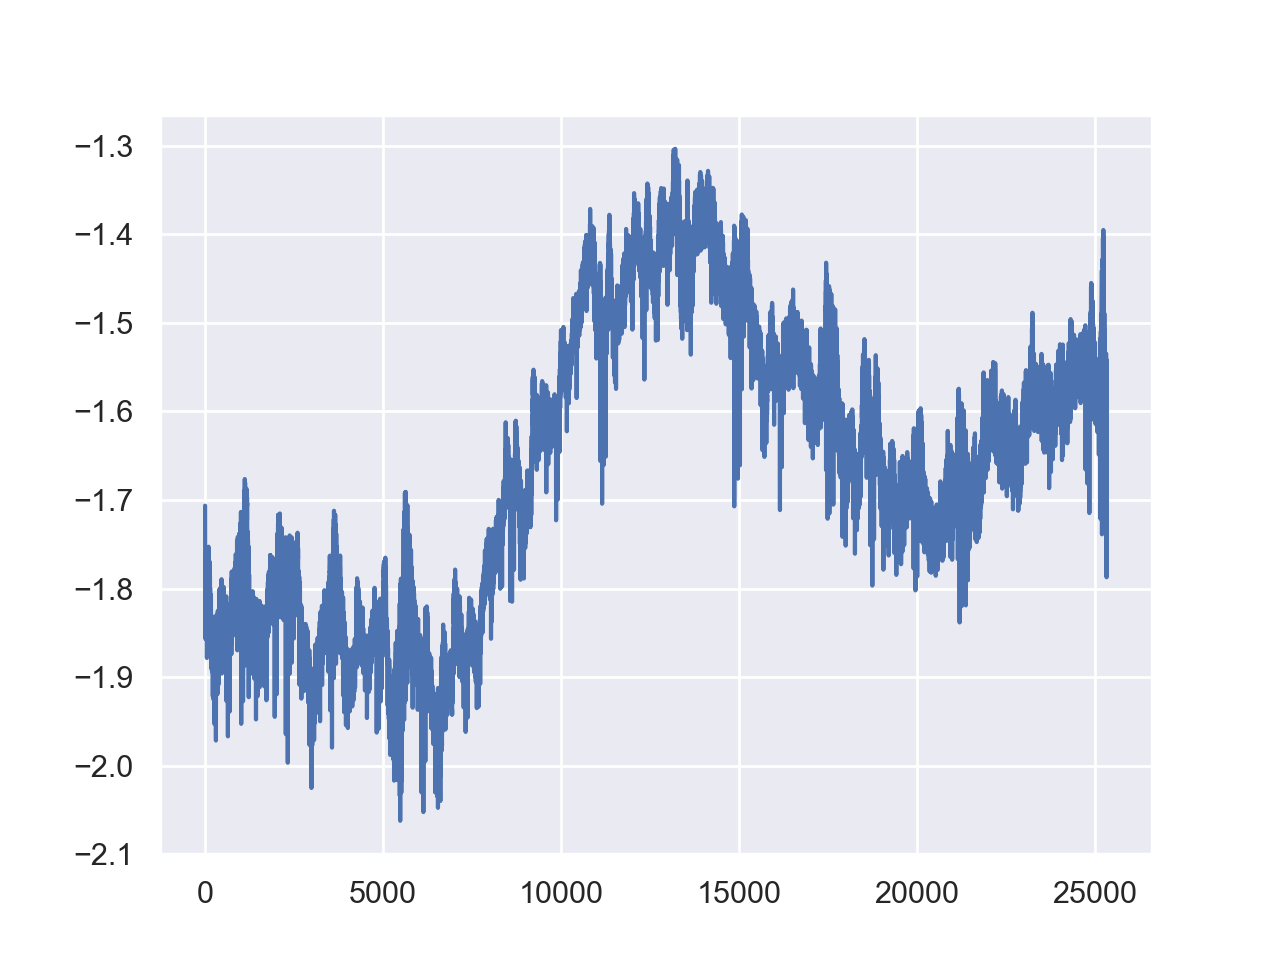

In [6]:
plt.plot(Y_dsp)

In [15]:
cap = ['cp003']

In [16]:
cap

['cp003']